# Project 2: Fund portafolio

Team members: *Aishwarya Parida, Karthick Vel Kathirvel, Nikhil Suresh Nair, Rafain Rodriguez*

### Setup

In [3]:
!pip install gurobipy numpy pandas seaborn matplotlib

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import gurobipy as gp

### Load Data

In [3]:
stocks_19 = pd.read_csv('./Data/stocks2019.csv', index_col=0)
stocks_20 = pd.read_csv('./Data/stocks2020.csv', index_col=0)

In [6]:
stocks_19

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2019-01-02,6360.870117,46.350380,224.570007,18.830000,98.050003,202.119995,1054.680054,1045.849976,1539.130005,182.458298,...,27.590000,247.970001,147.759995,107.364159,164.080002,63.920757,159.740005,36.312473,46.041862,84.600266
2019-01-03,6147.129883,44.704514,215.699997,17.049999,100.209999,184.779999,1025.469971,1016.059998,1500.280029,179.681961,...,26.959999,243.360001,142.589996,104.083450,163.729996,63.253742,154.020004,33.835327,45.860447,81.414970
2019-01-04,6422.669922,46.488358,226.190002,19.000000,106.000000,186.710007,1078.069946,1070.709961,1575.390015,185.824142,...,28.549999,255.029999,148.970001,108.678413,172.699997,65.358139,163.350006,35.268467,46.309223,85.184715
2019-01-07,6488.250000,47.799141,229.259995,20.570000,107.940002,189.919998,1075.920044,1068.390015,1629.510010,188.324738,...,29.180000,271.000000,151.399994,108.787117,175.850006,65.733910,163.500000,36.521275,46.108707,87.434891
2019-01-08,6551.850098,49.247898,232.679993,20.750000,108.610001,192.949997,1085.369995,1076.280029,1656.579956,190.739777,...,29.480000,276.000000,156.919998,109.755516,178.190002,67.049149,166.949997,36.170105,46.643410,85.769180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,8696.009766,58.505219,328.950012,45.459999,110.459999,278.140015,1350.630005,1348.839966,1793.000000,238.099670,...,34.660000,253.020004,192.429993,148.814499,219.979996,56.759140,165.610001,61.401749,61.415092,97.683632
2019-12-24,8699.509766,58.425743,329.640015,46.540001,110.279999,277.890015,1344.430054,1343.560059,1789.209961,237.413879,...,34.470001,252.490005,192.750000,148.436371,220.559998,56.545940,166.190002,60.941479,61.655396,97.278679
2019-12-26,8778.309570,58.505219,331.200012,46.630001,108.930000,278.260010,1362.469971,1360.400024,1868.770020,236.992599,...,34.570000,251.330002,193.710007,148.098038,220.250000,57.078938,165.360001,61.499676,61.586739,97.466339


In [7]:
stocks_20

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
1/2/20,8872.219727,58.266792,334.429993,49.099998,107.839996,283.679993,1368.680054,1367.369995,1898.010010,231.917572,...,36.970001,254.550003,196.729996,150.167465,219.449997,56.046688,167.460007,64.771545,60.782249,100.115349
1/3/20,8793.900391,58.286655,331.809998,48.599998,106.410004,280.440002,1361.520020,1360.660034,1874.969971,230.343124,...,36.180000,250.169998,200.880005,151.628220,217.979996,56.046688,168.440002,63.774597,61.074562,97.810677
1/6/20,8848.519531,59.349670,333.709991,48.389999,106.580002,285.880005,1397.810059,1394.209961,1902.880005,232.110748,...,35.689999,250.949997,202.740005,151.976013,224.029999,56.530506,169.490005,62.550629,60.986866,95.771927
1/7/20,8846.450195,59.945747,333.390015,48.250000,106.849998,283.059998,1395.109985,1393.339966,1906.859985,229.927765,...,37.330002,253.089996,203.210007,153.247955,223.789993,56.245903,172.949997,66.785164,60.860199,97.958405
1/8/20,8912.370117,59.488754,337.869995,47.830002,108.580002,286.000000,1405.040039,1404.319946,1891.969971,230.101654,...,36.869999,258.000000,204.149994,154.658997,231.089996,52.963551,178.710007,67.752487,60.801735,97.682640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/23/20,12653.139650,90.209999,496.910004,91.550003,153.240005,525.000000,1728.229980,1732.380005,3185.270020,221.294556,...,32.630001,268.459991,214.009995,199.970001,235.839996,39.493504,248.759995,49.930000,64.309998,141.990005
12/24/20,12711.009770,90.959999,499.859985,91.809998,152.630005,528.030029,1734.160034,1738.849976,3172.689941,221.284622,...,31.990000,264.640015,214.589996,201.229996,234.460007,39.245865,248.759995,49.919998,64.629997,141.990005
12/28/20,12838.860350,91.430000,498.950012,91.599998,154.360001,520.859985,1773.959961,1776.089966,3283.959961,221.999313,...,31.900000,278.170013,216.800003,207.979996,232.470001,39.285488,241.919998,50.060001,65.320000,141.520004
12/29/20,12843.490230,91.370003,502.109985,90.620003,155.350006,520.450012,1757.760010,1758.719971,3322.000000,225.195541,...,32.029999,277.339996,215.630005,205.669998,233.490005,39.037846,237.720001,48.290001,65.419998,139.899994


### Initializing

In [17]:
gurobi_time_limit = 6

index_name = stocks_19.columns.values[:1][0]
print(f'1st Stock: {index_name}\n')

stock_names = stocks_19.columns.values[1:]
print(f'Stock Names: {stock_names}\n')

num_stocks = len(stock_names)

1st Stock: NDX

Stock Names: ['ATVI' 'ADBE' 'AMD' 'ALXN' 'ALGN' 'GOOGL' 'GOOG' 'AMZN' 'AMGN' 'ADI'
 'ANSS' 'AAPL' 'AMAT' 'ASML' 'ADSK' 'ADP' 'BIDU' 'BIIB' 'BMRN' 'BKNG'
 'AVGO' 'CDNS' 'CDW' 'CERN' 'CHTR' 'CHKP' 'CTAS' 'CSCO' 'CTXS' 'CTSH'
 'CMCSA' 'CPRT' 'COST' 'CSX' 'DXCM' 'DOCU' 'DLTR' 'EBAY' 'EA' 'EXC' 'EXPE'
 'FB' 'FAST' 'FISV' 'GILD' 'IDXX' 'ILMN' 'INCY' 'INTC' 'INTU' 'ISRG' 'JD'
 'KLAC' 'KHC' 'LRCX' 'LBTYA' 'LBTYK' 'LULU' 'MAR' 'MXIM' 'MELI' 'MCHP'
 'MU' 'MSFT' 'MRNA' 'MDLZ' 'MNST' 'NTES' 'NFLX' 'NVDA' 'NXPI' 'ORLY'
 'PCAR' 'PAYX' 'PYPL' 'PEP' 'PDD' 'QCOM' 'REGN' 'ROST' 'SGEN' 'SIRI'
 'SWKS' 'SPLK' 'SBUX' 'SNPS' 'TMUS' 'TTWO' 'TSLA' 'TXN' 'TCOM' 'ULTA'
 'VRSN' 'VRSK' 'VRTX' 'WBA' 'WDAY' 'WDC' 'XEL' 'XLNX']



## Q1

### Correlation

In [13]:
returns_19 = stocks_19.apply(lambda x: (x-x.shift(1))/x.shift(1))[1:]
returns_19.head()

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.033602,-0.035509,-0.039498,-0.094530,0.022030,-0.085791,-0.027696,-0.028484,-0.025242,-0.015216,...,-0.022834,-0.018591,-0.034989,-0.030557,-0.002133,-0.010435,-0.035808,-0.068217,-0.003940,-0.037651
2019-01-04,0.044824,0.039903,0.048632,0.114370,0.057779,0.010445,0.051294,0.053786,0.050064,0.034184,...,0.058976,0.047954,0.044744,0.044147,0.054785,0.033269,0.060577,0.042356,0.009786,0.046303
2019-01-07,0.010211,0.028196,0.013573,0.082632,0.018302,0.017192,-0.001994,-0.002167,0.034353,0.013457,...,0.022067,0.062620,0.016312,0.001000,0.018240,0.005749,0.000918,0.035522,-0.004330,0.026415
2019-01-08,0.009802,0.030309,0.014918,0.008751,0.006207,0.015954,0.008783,0.007385,0.016612,0.012824,...,0.010281,0.018450,0.036460,0.008902,0.013307,0.020009,0.021101,-0.009615,0.011597,-0.019051
2019-01-09,0.007454,0.017210,0.011819,-0.026988,0.012430,0.038196,-0.003427,-0.001505,0.001714,-0.001196,...,0.023745,0.018804,-0.008157,0.003781,0.023065,0.012050,-0.004612,0.044083,-0.007984,0.008972


In [14]:
returns_20 = stocks_20.apply(lambda x: (x - x.shift(1))/x.shift(1))[1:]
returns_20.head()

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
1/3/20,-0.008827,0.000341,-0.007834,-0.010183,-0.013260,-0.011421,-0.005231,-0.004907,-0.012139,-0.006789,...,-0.021369,-0.017207,0.021095,0.009728,-0.006699,0.000000,0.005852,-0.015392,0.004809,-0.023020
1/6/20,0.006211,0.018238,0.005726,-0.004321,0.001598,0.019398,0.026654,0.024657,0.014886,0.007674,...,-0.013543,0.003118,0.009259,0.002294,0.027755,0.008632,0.006234,-0.019192,-0.001436,-0.020844
1/7/20,-0.000234,0.010043,-0.000959,-0.002893,0.002533,-0.009864,-0.001932,-0.000624,0.002092,-0.009405,...,0.045951,0.008528,0.002318,0.008369,-0.001071,-0.005035,0.020414,0.067698,-0.002077,0.022830
1/8/20,0.007452,-0.007623,0.013438,-0.008705,0.016191,0.010386,0.007118,0.007880,-0.007809,0.000756,...,-0.012323,0.019400,0.004626,0.009208,0.032620,-0.058357,0.033304,0.014484,-0.000961,-0.002815
1/9/20,0.008669,-0.009018,0.007636,0.023834,0.019893,0.036853,0.010498,0.011044,0.004799,0.002980,...,0.006781,0.021318,0.023169,0.009638,-0.003592,-0.020598,0.004309,-0.000291,0.002244,0.023493


In [15]:
corr_matrix = returns_19.iloc[:,1:].corr()
corr_matrix

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
ATVI,1.000000,0.399939,0.365376,0.223162,0.216280,0.433097,0.426777,0.467076,0.203956,0.329355,...,0.322906,0.128241,0.464850,0.316549,0.259679,0.218149,0.311659,0.303077,0.043389,0.249667
ADBE,0.399939,1.000000,0.452848,0.368928,0.363370,0.552125,0.540404,0.598237,0.291978,0.473815,...,0.360392,0.201151,0.711339,0.541243,0.402171,0.228106,0.650430,0.361516,0.207403,0.289497
AMD,0.365376,0.452848,1.000000,0.301831,0.344252,0.418861,0.417254,0.549302,0.151452,0.503733,...,0.332776,0.210623,0.498342,0.330900,0.272983,0.281950,0.407626,0.438892,0.017283,0.478010
ALXN,0.223162,0.368928,0.301831,1.000000,0.332433,0.315993,0.307698,0.363170,0.342022,0.317040,...,0.257143,0.408936,0.350581,0.191489,0.522423,0.192720,0.416396,0.289908,0.047947,0.200356
ALGN,0.216280,0.363370,0.344252,0.332433,1.000000,0.248747,0.250316,0.399281,0.264599,0.328280,...,0.175957,0.128559,0.360886,0.251855,0.334978,0.219595,0.308968,0.284407,0.088059,0.253934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBA,0.218149,0.228106,0.281950,0.192720,0.219595,0.232900,0.230603,0.288168,0.194490,0.347861,...,0.257049,0.145330,0.195475,0.126118,0.214585,1.000000,0.211641,0.296309,-0.130798,0.276643
WDAY,0.311659,0.650430,0.407626,0.416396,0.308968,0.379493,0.371826,0.424748,0.211712,0.351734,...,0.235045,0.269545,0.569672,0.401476,0.376047,0.211641,1.000000,0.315699,0.209240,0.254117
WDC,0.303077,0.361516,0.438892,0.289908,0.284407,0.328619,0.322110,0.419620,0.172623,0.602935,...,0.377215,0.126463,0.331916,0.308558,0.314773,0.296309,0.315699,1.000000,-0.076115,0.516958
XEL,0.043389,0.207403,0.017283,0.047947,0.088059,0.059930,0.052570,0.076724,0.137857,-0.047259,...,-0.172752,0.074686,0.280371,0.407770,0.191667,-0.130798,0.209240,-0.076115,1.000000,-0.117552


## Q2

### Stock Selection

In [42]:
# Number of stocks in our fund
m = 5

In [43]:
mod = gp.Model()

y = mod.addMVar(num_stocks, vtype="B")
x = mod.addMVar((num_stocks, num_stocks), vtype="B")

# number of stocks in fund constraint
size_fund_c = mod.addConstr( gp.quicksum(y[i] for i in range(num_stocks)) == m)
# # all stocks represented by single stock constraint
stock_incl_c = mod.addConstrs( gp.quicksum( x[i][j] for j in range(num_stocks) ) == 1 for i in range(num_stocks))
# each stock represented by a stock on the fund
stock_rep_c = mod.addConstrs( x[i][j] <= y[j] for i in range(num_stocks) for j in range(num_stocks))

# Set objective value
mod.setObjective( gp.quicksum( x[i][j]*corr_matrix.iloc[i,j] for i in range(num_stocks) for j in range(num_stocks)) , gp.GRB.MAXIMIZE)
mod.Params.output_flag = 0
mod.optimize()

In [44]:
mod.ObjVal

54.83990652229107

In [45]:
selection_array = y.X
selected_stocks = stock_names[ y.X == 1]
selected_stocks

array(['LBTYK', 'MXIM', 'MSFT', 'VRTX', 'XEL'], dtype=object)

### Stock Weights

In [46]:
num_t = len(returns_19)

In [47]:
mod_w = gp.Model()

w = mod_w.addMVar(m)
y = mod_w.addMVar(num_t)

# Add of weigths of selected stocks equal to 1
w_cons = mod_w.addConstr( gp.quicksum(w[i] for i in range(m)) == 1)
# Absolute value constraints
abs_cons1 = mod_w.addConstrs( y[t] >= returns_19[index_name][t] - gp.quicksum(w[i]*returns_19[selected_stocks[i]][t] for i in range(m) ) for t in range(num_t))
abs_cons2 = mod_w.addConstrs( y[t] >= gp.quicksum(w[i]*returns_19[selected_stocks[i]][t] for i in range(m) ) - returns_19[index_name][t] for t in range(num_t))

mod_w.setObjective( gp.quicksum(y[t] for t in range(num_t)) )

mod_w.Params.output_flag = 0
mod_w.optimize()

C:\Users\nikna\AppData\Local\Temp\ipykernel_2372\3552053945.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abs_cons1 = mod_w.addConstrs( y[t] >= returns_19[index_name][t] - gp.quicksum(w[i]*returns_19[selected_stocks[i]][t] for i in range(m) ) for t in range(num_t))
C:\Users\nikna\AppData\Local\Temp\ipykernel_2372\3552053945.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abs_cons2 = mod_w.addConstrs( y[t] >= gp.quicksum(w[i]*returns_19[selected_stocks[i]][t] for i in range(m) ) - returns_19[index_name][t] for t in range(num_t))


In [48]:
stock_weights = w.X
stock_weights

array([0.04886175, 0.21038806, 0.58035198, 0.07119022, 0.089208  ])

### How well this portfolio perform in 2020

In [78]:
error = abs(returns_20[index_name] - sum(returns_20[selected_stocks[i]]*stock_weights[i] for i in range(m)))
error.sum()

0.36867085361029045

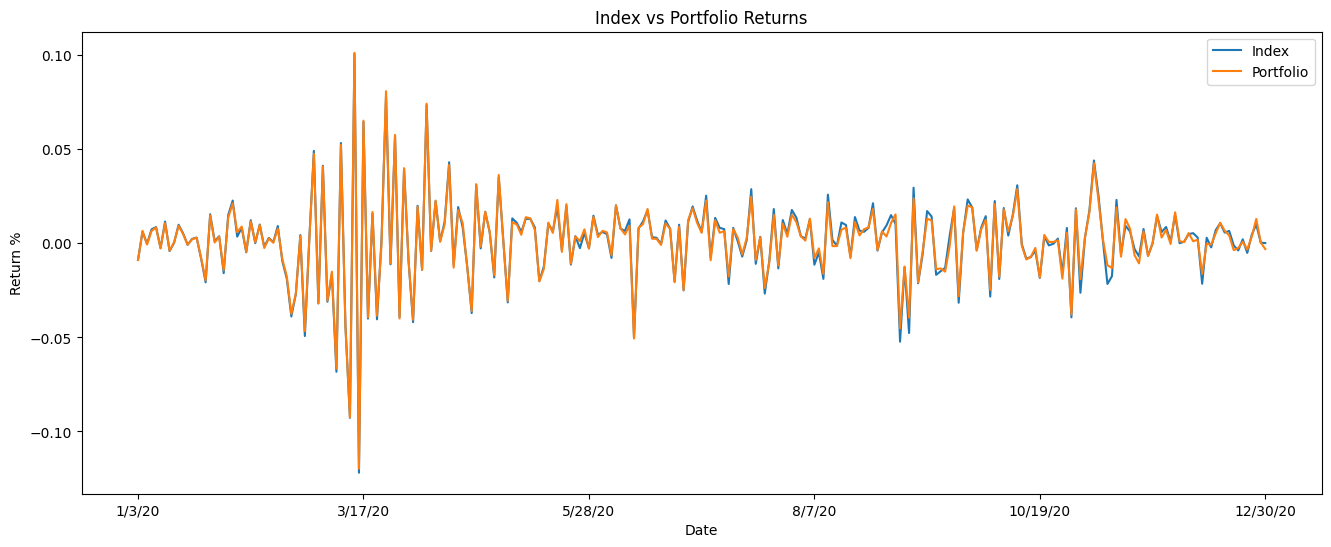

In [79]:
# Set the figure size
plt.figure(figsize=(16, 6))

# Plot the first series (returns_20[index_name])
returns_20[index_name].plot(label='Index')

# Plot the second series (sum of returns for selected_stocks weighted by stock_weights)
combined_returns = sum(returns_20[selected_stocks[i]] * stock_weights[i] for i in range(m))
combined_returns.plot(label='Portfolio')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Return %')
plt.title('Index vs Portfolio Returns')
plt.legend()

# Show the plot
plt.show()

## Q3

### Do this with m = 10, 20, ..., 90, 100

In [62]:
portfolio_size = []
stock_selection = []
stock_ws = []
perfs_19 = []
perfs_20 = []

for new_m in range(10, num_stocks+1, 10):
    # Number of stocks in our fund
    m = new_m
    portfolio_size.append(new_m)
    # Stock Weight Calculation
    num_t = len(returns_19)

    # Stock Selection Model
    mod = gp.Model()

    y = mod.addMVar(num_stocks, vtype="B")
    x = mod.addMVar((num_stocks, num_stocks), vtype="B")

    # number of stocks in fund constraint
    size_fund_c = mod.addConstr( gp.quicksum(y[i] for i in range(num_stocks)) == m)
    # # all stocks represented by single stock constraint
    stock_incl_c = mod.addConstrs( gp.quicksum( x[i][j] for j in range(num_stocks) ) == 1 for i in range(num_stocks))
    # each stock represented by a stock on the fund
    stock_rep_c = mod.addConstrs( x[i][j] <= y[j] for i in range(num_stocks) for j in range(num_stocks))

    # Set objective value
    mod.setObjective( gp.quicksum( x[i][j]*corr_matrix.iloc[i,j] for i in range(num_stocks) for j in range(num_stocks)) , gp.GRB.MAXIMIZE)
    
    mod.Params.output_flag = 0
    mod.optimize()

    selection_array = y.X
    selected_stocks = stock_names[ y.X == 1]
    stock_selection.append(selected_stocks)

    # Weight Selection Model
    mod_w = gp.Model()

    w = mod_w.addMVar(m)
    y = mod_w.addMVar(num_t)

    # Add of weigths of selected stocks equal to 1
    w_cons = mod_w.addConstr( gp.quicksum(w[i] for i in range(m)) == 1)
    # Absolute value constraints
    abs_cons1 = mod_w.addConstrs( y[t] >= returns_19[index_name][t] - gp.quicksum(w[i]*returns_19[selected_stocks[i]][t] for i in range(m) ) for t in range(num_t))
    abs_cons2 = mod_w.addConstrs( y[t] >= gp.quicksum(w[i]*returns_19[selected_stocks[i]][t] for i in range(m) ) - returns_19[index_name][t] for t in range(num_t))

    mod_w.setObjective( gp.quicksum(y[t] for t in range(num_t)) )
    
    mod_w.Params.output_flag = 0
    mod_w.optimize()

    stock_weights = w.X
    stock_ws.append(stock_weights)

    # Performance Metric
    performance_19 = abs(returns_19[index_name] - sum(returns_19[selected_stocks[i]]*stock_weights[i] for i in range(m)))
    perfs_19.append(performance_19.sum())
    performance_20 = abs(returns_20[index_name] - sum(returns_20[selected_stocks[i]]*stock_weights[i] for i in range(m)))
    perfs_20.append(performance_20.sum())


C:\Users\nikna\AppData\Local\Temp\ipykernel_2372\3175676931.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abs_cons1 = mod_w.addConstrs( y[t] >= returns_19[index_name][t] - gp.quicksum(w[i]*returns_19[selected_stocks[i]][t] for i in range(m) ) for t in range(num_t))
C:\Users\nikna\AppData\Local\Temp\ipykernel_2372\3175676931.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abs_cons2 = mod_w.addConstrs( y[t] >= gp.quicksum(w[i]*returns_19[selected_stocks[i]][t] for i in range(m) ) - returns_19[index_name][t] for t in range(num_t))


In [80]:
print(f'Error with 2019\n{perfs_19}\nError with 2020\n{perfs_20}')

Error with 2019
[0.701217795926629, 0.4737360337984601, 0.418014755023017, 0.3705172225552053, 0.33254009291547626, 0.3448899790645146, 0.16982371827530968, 0.14768252800096188, 0.053779189845471614, 0.04491115168421998]
Error with 2020
[1.1024044007150986, 0.940289090937117, 0.7691103647201438, 0.791047220795664, 0.7720996592108096, 1.0973035971623957, 0.5578542933361359, 0.5373227700587164, 0.3677895223580838, 0.36867085361029045]


In [73]:
sum(returns_20[selected_stocks[i]]*stock_weights[i] for i in range(m))

1/3/20     -0.008854
1/6/20      0.006662
1/7/20     -0.000618
1/8/20      0.006619
1/9/20      0.008424
              ...   
12/23/20   -0.003277
12/24/20    0.003585
12/28/20    0.013003
12/29/20    0.000403
12/30/20   -0.003045
Length: 251, dtype: float64

In [81]:
error = abs(returns_20[index_name] - sum(returns_20[selected_stocks[i]]*stock_weights[i] for i in range(m)))
error.sum()

0.36867085361029045

In [82]:
returns_19.sum().sum()

36.39889658850975

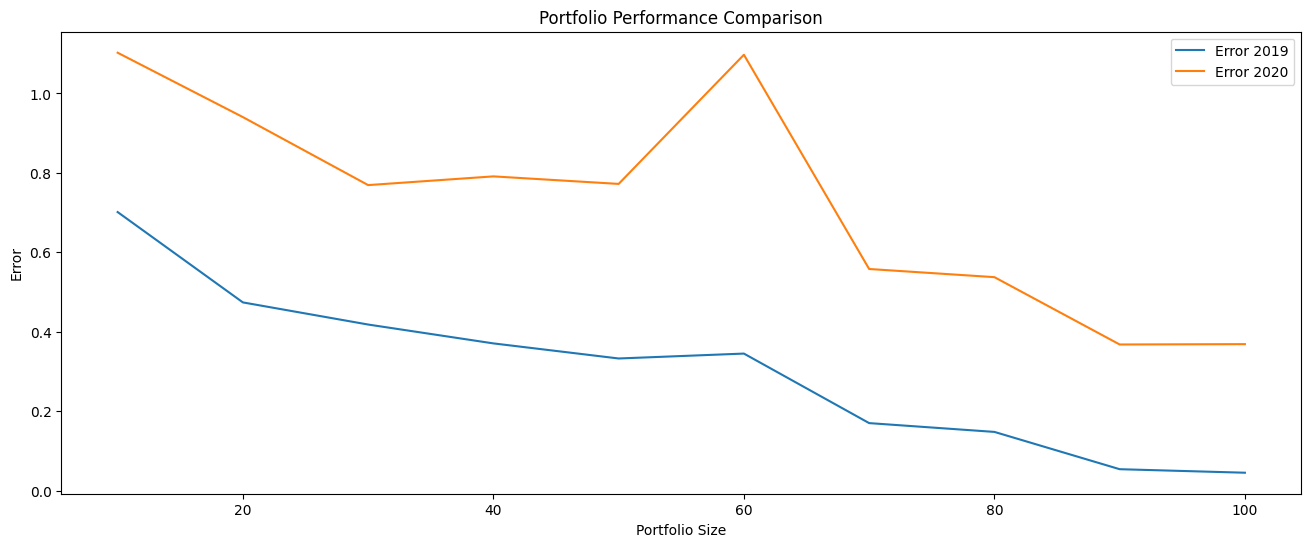

In [77]:
# Set the figure size
plt.figure(figsize=(16, 6))

# Plot the first series (perfs_19)
plt.plot(portfolio_size, perfs_19, label='Error 2019')

# Plot the second series (perfs_20)
plt.plot(portfolio_size, perfs_20, label='Error 2020')

# Add labels and legend
plt.xlabel('Portfolio Size')
plt.ylabel('Error')
plt.title('Portfolio Performance Comparison')
plt.legend()

# Show the plot
plt.show()

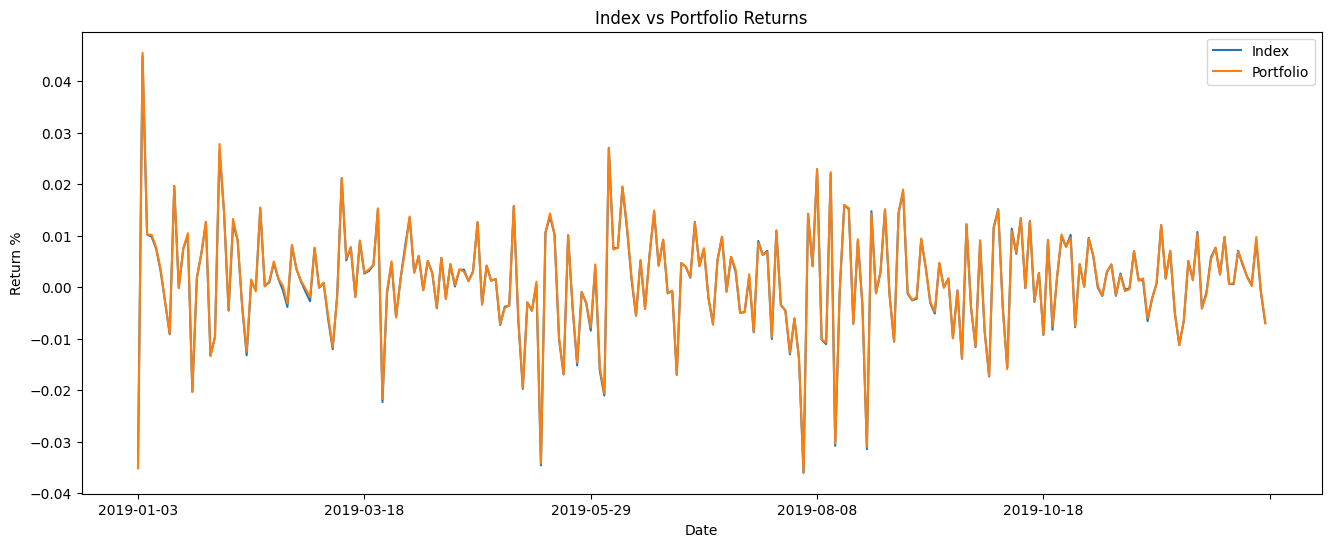

In [64]:
# Set the figure size
plt.figure(figsize=(16, 6))

# Plot the first series (returns_20[index_name])
returns_19[index_name].plot(label='Index')

# Plot the second series (sum of returns for selected_stocks weighted by stock_weights)
combined_returns = sum(returns_19[selected_stocks[i]] * stock_weights[i] for i in range(m))
combined_returns.plot(label='Portfolio')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Return %')
plt.title('Index vs Portfolio Returns')
plt.legend()

# Show the plot
plt.show()

## Q4

In [24]:
index_rt = returns_19[index_name].values

In [28]:
error_2019 = []
error_2020 = []

M = 2 #however, smallest big M could be >1 because weights cannot be more than 1
M1 = 0.00001
t = returns_19.shape[0]
rt = returns_19.values
results = pd.DataFrame(columns=['m', 'selected_stocks', 'weights', 'error_2019','error_2020'])

m_list = [i for i in range(10, 101, 10)]

In [29]:
for m in m_list:
    wmod = gp.Model()
    
    wmodX = wmod.addMVar(num_stocks, vtype='C', lb=0)
    wmodO = wmod.addMVar(t, vtype='C')
    wmodY = wmod.addMVar(num_stocks, vtype='B')

    wmod.setObjective(gp.quicksum(wmodO[i] for i in range(t)))

    constr1 = wmod.addConstr(gp.quicksum(wmodX[i] for i in range(num_stocks)) == 1)
    constr2 = wmod.addConstrs((wmodO[i] >= (index_rt[i] - gp.quicksum(wmodX[j]*rt[i][j] for j in range(num_stocks)))) for i in range(t))
    constr3 = wmod.addConstrs((wmodO[i] >= -1*(index_rt[i] - gp.quicksum(wmodX[j]*rt[i][j] for j in range(num_stocks)))) for i in range(t))
    constr4 = wmod.addConstrs((wmodX[i] <= M*wmodY[i]) for i in range(num_stocks))
    constr5 = wmod.addConstr(gp.quicksum(wmodY[i] for i in range(num_stocks)) == m)
    constr6 = wmod.addConstrs((wmodX[i] >= M1*wmodY[i]) for i in range(num_stocks))

    wmod.Params.OutputFlag = 0 # tell gurobi to shut up!!
    wmod.setParam('TimeLimit', gurobi_time_limit) # Stopping gurobi after 1 hour
    wmod.optimize()

    weights = [wmodX[i].X for i in range(num_stocks) if wmodY[i].X == 1]
    error_2019 = wmod.ObjVal

    selected_stocks = [corr_matrix.columns[j] for j in range(num_stocks) if wmodY[j].X == 1]

    return_set = returns_20
    index_return = returns_20[index_name]
    T = len(return_set)
    total = 0
    for t in range(T):
        total += abs(index_return.iloc[t] - sum(wmodX[i].X * return_set.iloc[t,i] for i in range(num_stocks)))

    error_2020 = total

    new_row = {'m': m, 'selected_stocks': selected_stocks, 'weights': weights, 'error_2019': error_2019, 'error_2020': error_2020}
    results.loc[len(results)] = new_row

results.to_csv('result_5.csv', index=False)